# **Give Me Some Credit**

**Variable Name Description Type**

* SeriousDlqin2yrs Person experienced 90 days past due delinquency or worse Y/N
* RevolvingUtilizationOfUnsecuredLines Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits percentage
* age Age of borrower in years integer
* NumberOfTime3059DaysPastDueNotWorse Number of times borrower has been 30-59 days past due but no worse in the last 2 years. integer
* DebtRatio Monthly debt payments, alimony,living costs divided by monthy gross income percentage
* MonthlyIncome Monthly income real
* NumberOfOpenCreditLinesAndLoans Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) integer
* NumberOfTimes90DaysLate Number of times borrower has been 90 days or more past due. integer
* NumberRealEstateLoansOrLines Number of mortgage and real estate loans including home equity lines of credit integer
* NumberOfTime60-89DaysPastDueNotWorse Number of times borrower has been 60-89 days past due but no worse in the last 2 years. integer
* NumberOfDependents Number of dependents in family excluding themselves (spouse, children etc.) integer

**Importing libraries**

In [188]:
import pandas as pd 
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,confusion_matrix,auc
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, auc
from sklearn import model_selection
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

In [148]:
train='cs-training.csv'
test='cs-test.csv'
sample='sampleEntry.csv'
df_train=pd.read_csv(train,sep=',')
df_test=pd.read_csv(test,sep=',')
df_sample=pd.read_csv(sample,sep=',')

In [149]:
def big_shape(train,test,sample):
    print('Data Train is ',train.shape)
    print('Data Test is ',test.shape)
    print('Data sample is ',sample.shape)

In [150]:
big_shape(df_train,df_test,df_sample)

Data Train is  (150000, 12)
Data Test is  (101503, 12)
Data sample is  (101503, 2)


In [151]:
df_train.drop(columns=['Unnamed: 0'],inplace=True)
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [152]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [153]:
num_int=df_train.select_dtypes(include='int64').columns
num_float=df_train.select_dtypes(include='float64').columns

In [154]:
df_train[num_int].describe()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,52.295207,0.421033,8.452760,0.265973,1.018240,0.240387
std,0.249746,14.771866,4.192781,5.145951,4.169304,1.129771,4.155179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,5.000000,0.000000,0.000000,0.000000
50%,0.000000,52.000000,0.000000,8.000000,0.000000,1.000000,0.000000
75%,0.000000,63.000000,0.000000,11.000000,0.000000,2.000000,0.000000
max,1.000000,109.000000,98.000000,58.000000,98.000000,54.000000,98.000000


In [155]:
df_train[num_float].describe()

,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfDependents
count,150000.000000,150000.000000,1.202690e+05,146076.000000
mean,6.048438,353.005076,6.670221e+03,0.757222
std,249.755371,2037.818523,1.438467e+04,1.115086
min,0.000000,0.000000,0.000000e+00,0.000000
25%,0.029867,0.175074,3.400000e+03,0.000000
50%,0.154181,0.366508,5.400000e+03,0.000000
75%,0.559046,0.868254,8.249000e+03,1.000000
max,50708.000000,329664.000000,3.008750e+06,20.000000


In [156]:
df_test.drop(columns=['Unnamed: 0'],inplace=True)
df_test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [157]:
df_sample.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [158]:
df_train.dtypes.value_counts()

int64      7
float64    4
Name: count, dtype: int64

In [159]:
def nulls_data (train,test):
    print('Valores nulos en el data train ',train.isnull().sum().sum())
    print('Valores nuloes en el data test ',test.isnull().sum().sum())
nulls_data(df_train,df_test)

Valores nulos en el data train  33655
Valores nuloes en el data test  124232


In [160]:
null_val_sums = df_train.isnull().sum()
pd.DataFrame({"Column": null_val_sums.index, "Number of Null Values": null_val_sums.values,
             "Proportion": null_val_sums.values / len(df_train) })

,Column,Number of Null Values,Proportion
0,SeriousDlqin2yrs,0,0.000000
1,RevolvingUtilizationOfUnsecuredLines,0,0.000000
2,age,0,0.000000
3,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
4,DebtRatio,0,0.000000
5,MonthlyIncome,29731,0.198207
6,NumberOfOpenCreditLinesAndLoans,0,0.000000
7,NumberOfTimes90DaysLate,0,0.000000
8,NumberRealEstateLoansOrLines,0,0.000000
9,NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


In [161]:
null_val_sums_test = df_test.isnull().sum()
pd.DataFrame({"Column": null_val_sums_test.index, "Number of Null Values": null_val_sums_test.values,
             "Proportion": null_val_sums_test.values / len(df_test) })

,Column,Number of Null Values,Proportion
0,SeriousDlqin2yrs,101503,1.000000
1,RevolvingUtilizationOfUnsecuredLines,0,0.000000
2,age,0,0.000000
3,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
4,DebtRatio,0,0.000000
5,MonthlyIncome,20103,0.198053
6,NumberOfOpenCreditLinesAndLoans,0,0.000000
7,NumberOfTimes90DaysLate,0,0.000000
8,NumberRealEstateLoansOrLines,0,0.000000
9,NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


* **Revolving Utilization Of UnsecuredLinesRevolvingUtilizationOfUnsecuredLines**

Defined as ratio of the total amount of money owed to total credit limit distribution of values is right-skewed, consider removing outliers
It is expected that as this value increases, the proportion of people defaulting should increase as well
However, we can see that as the minimum value of this column is set to 13, the proportion of defaulters is smaller than that belonging to the pool of clients with total amount of money owed not exceeding total credit limit.
Thus we should remove those samples with RevolvingUtilizationOfUnsecuredLines's value more tan equal to 13

In [162]:
df_train=df_train[df_train['RevolvingUtilizationOfUnsecuredLines']<13]
df_test=df_test[df_test['RevolvingUtilizationOfUnsecuredLines']<13]
print(df_train.shape)
print(df_test.shape)

(149762, 11)
(101352, 11)


## **EDA**

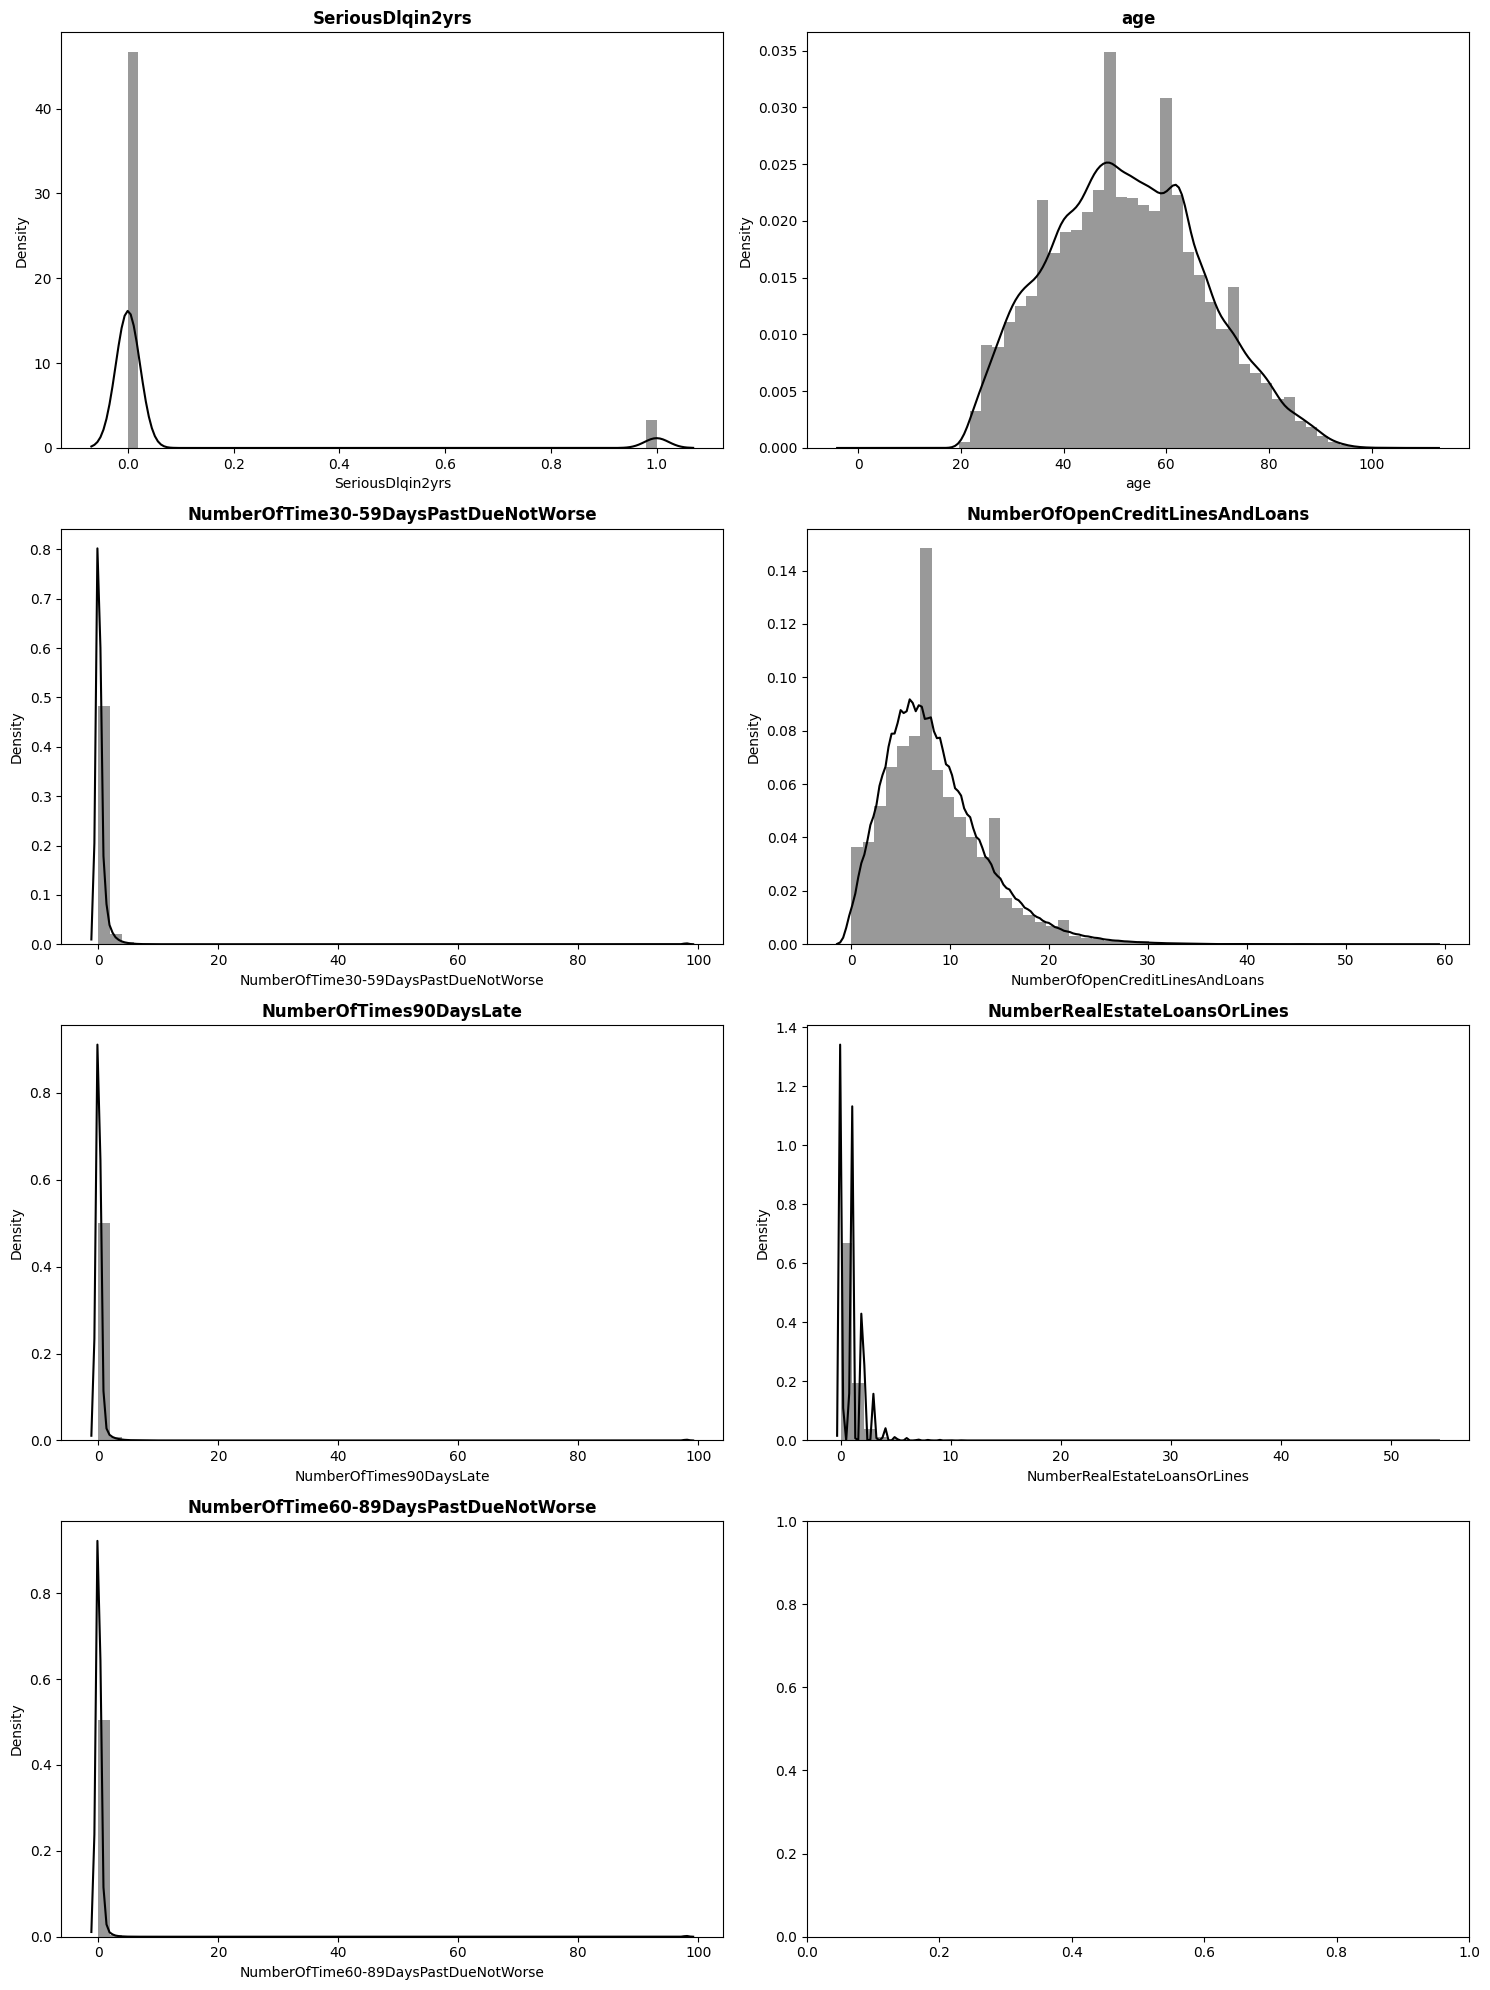

In [163]:
# Calcular el número total de gráficos
num_plots = len(num_int)

# Definir el número de filas y columnas
num_rows = 4
num_cols = 2

# Crear la figura y los ejes para los subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Aplanar la matriz de ejes para facilitar el indexado
axs = axs.flatten()

# Iterar sobre las variables y crear las gráficas
for i, var in enumerate(num_int):
    sns.distplot(df_train[var], ax=axs[i])
    axs[i].set_title(var, fontsize=12, weight='bold')

# Ajustar automáticamente el diseño de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

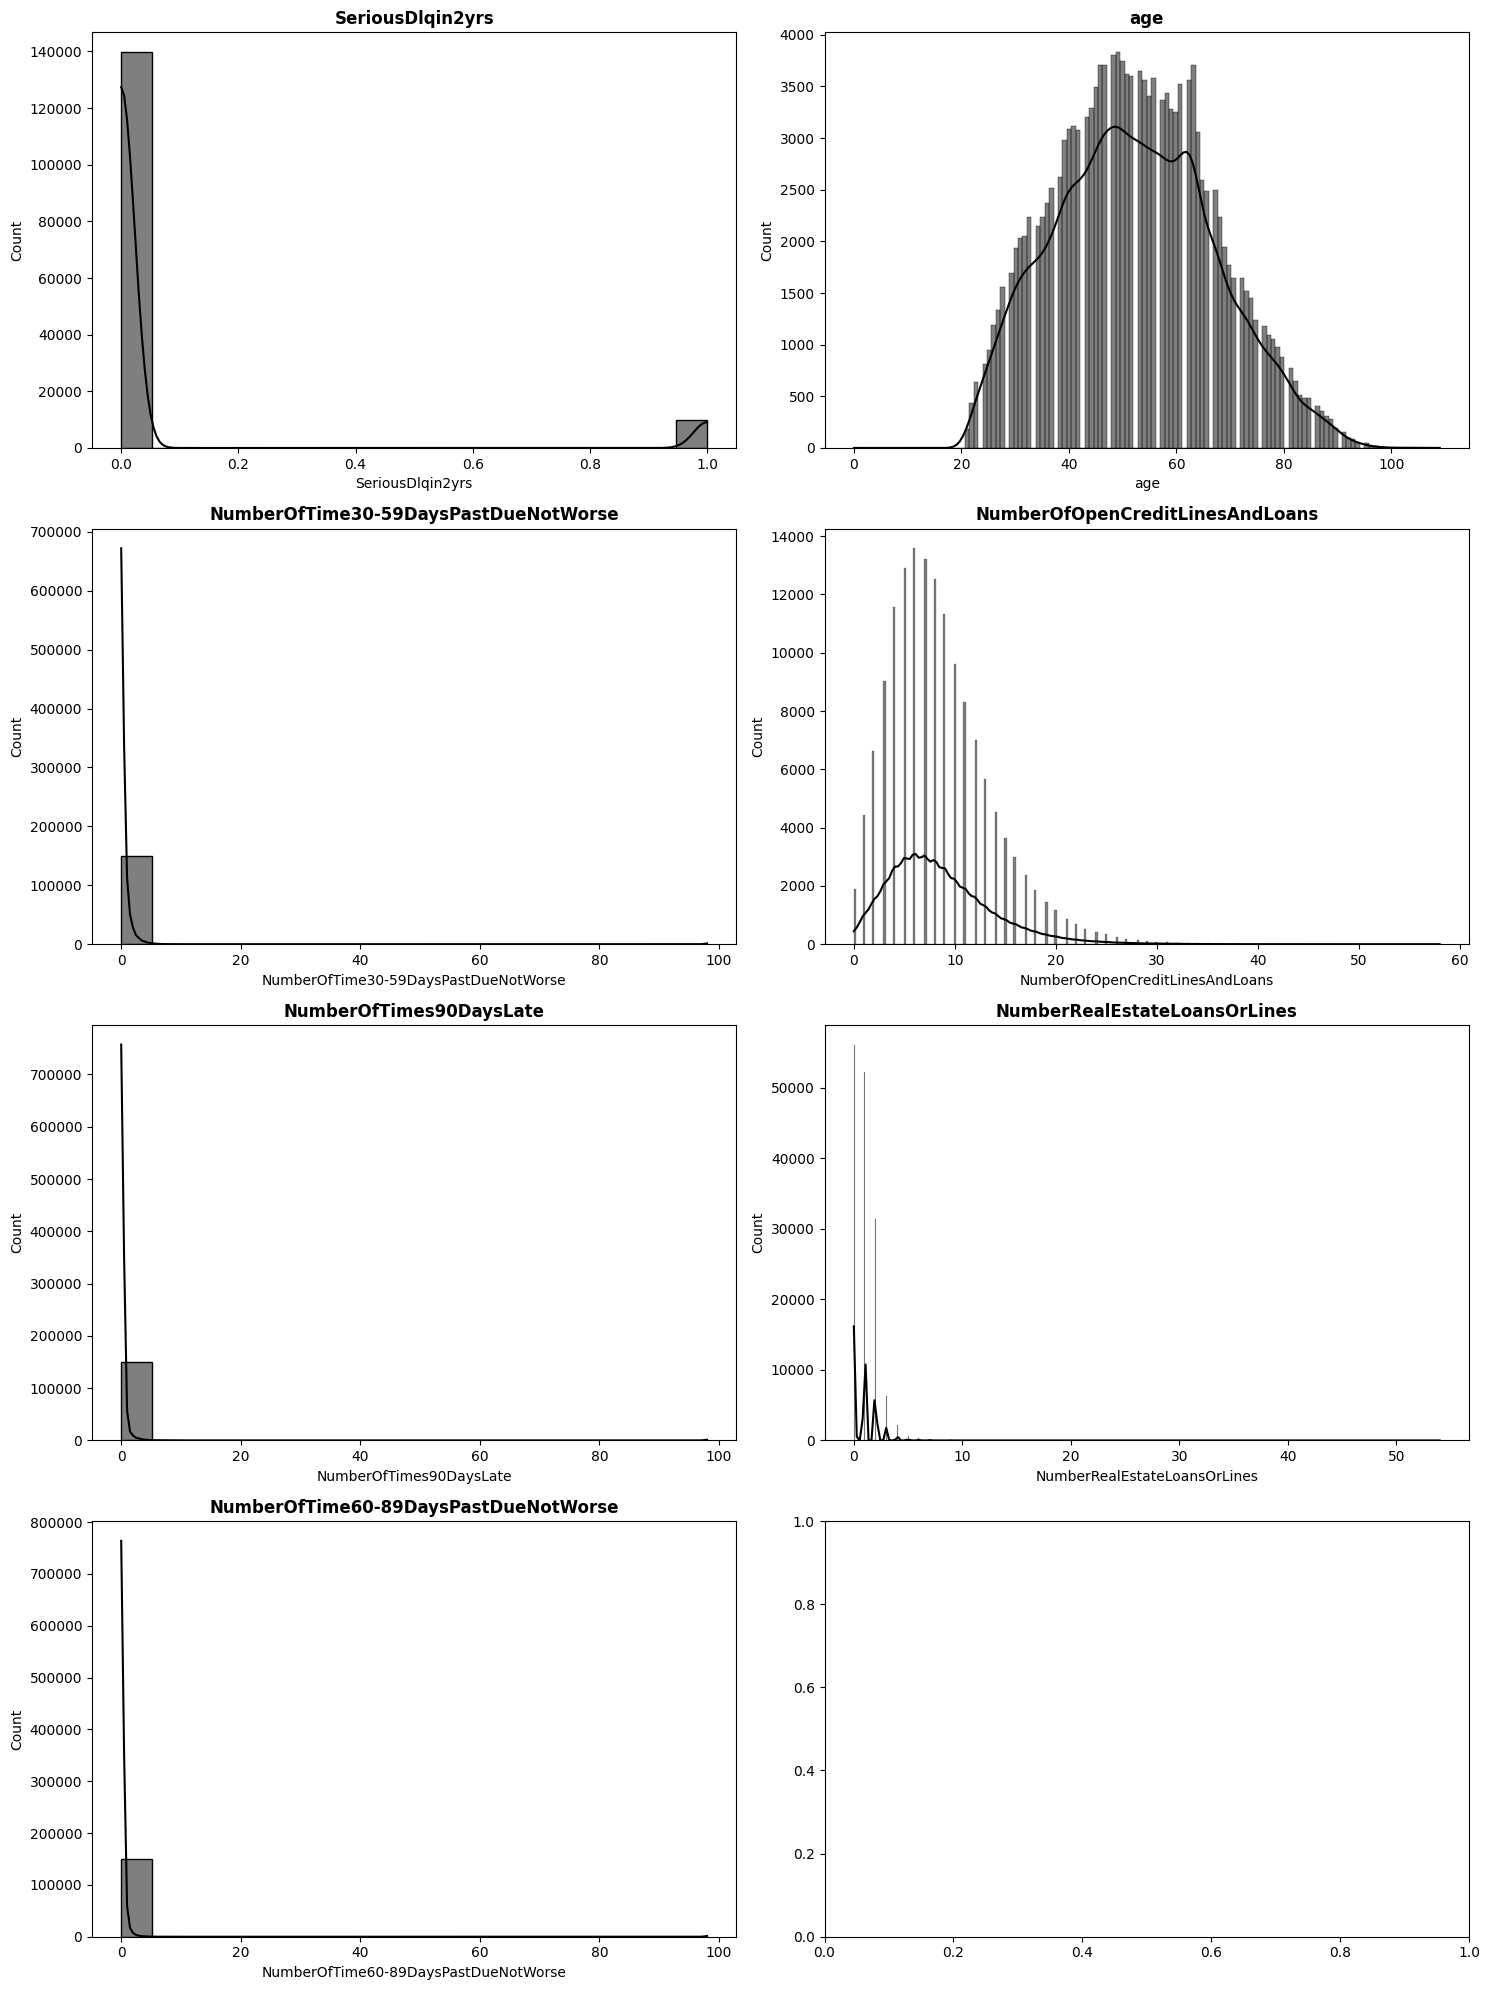

In [164]:
# Calcular el número total de gráficos
num_plots = len(num_int)

# Definir el número de filas y columnas
num_rows = 4
num_cols = 2

# Crear la figura y los ejes para los subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Aplanar la matriz de ejes para facilitar el indexado
axs = axs.flatten()

# Iterar sobre las variables y crear las gráficas
for i, var in enumerate(num_int):
    sns.histplot(df_train[var], ax=axs[i],kde=True)
    axs[i].set_title(var, fontsize=12, weight='bold')

# Ajustar automáticamente el diseño de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [165]:
# Obtener la cuenta de valores únicos y crear un DataFrame
SeriousDlqin2yrs = pd.DataFrame(df_train['SeriousDlqin2yrs'].value_counts().reset_index())

# Renombrar columnas
SeriousDlqin2yrs.columns = ['SeriousDlqin2yrs', 'Count']

# Mostrar el DataFrame resultante
print(SeriousDlqin2yrs)

   SeriousDlqin2yrs   Count
0                 0  139750
1                 1   10012


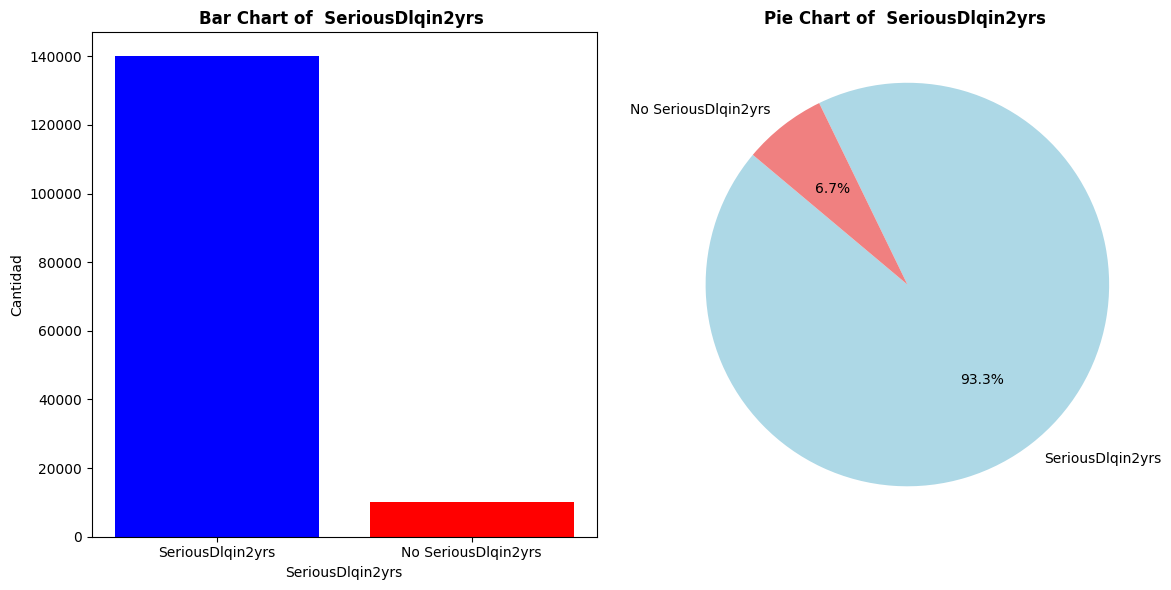

In [166]:
# Datos
labels = ['SeriousDlqin2yrs', 'No SeriousDlqin2yrs']
counts = [139974, 10026]
colors = ['lightblue', 'lightcoral']

# Crear figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras
axes[0].bar(labels, counts, color=['blue', 'red'])
axes[0].set_title('Bar Chart of  SeriousDlqin2yrs ',fontsize=12,weight='bold')
axes[0].set_xlabel('SeriousDlqin2yrs')
axes[0].set_ylabel('Cantidad')

# Gráfico circular
axes[1].pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Pie Chart of  SeriousDlqin2yrs ',fontsize=12,weight='bold')

# Ajustes de diseño
plt.tight_layout()

# Mostrar gráficos
plt.show()


    NumberOfTimes90DaysLate   Total
0                         0  141431
1                         1    5239
2                         2    1554
3                         3     666
4                         4     291
5                        98     264
6                         5     131
7                         6      80
8                         7      38
9                         8      20
10                        9      19
11                       10       8
12                       96       5
13                       11       5
14                       13       4
15                       15       2
16                       14       2
17                       12       2
18                       17       1


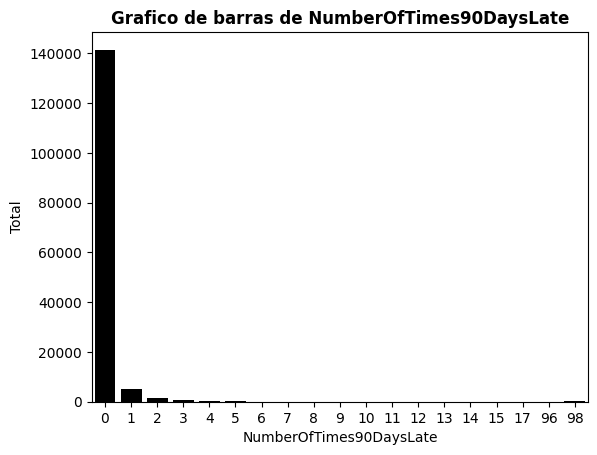

In [167]:
umberOfTimes90DaysLate_1=pd.DataFrame(df_train['NumberOfTimes90DaysLate'].value_counts().reset_index())
umberOfTimes90DaysLate_1.columns=['NumberOfTimes90DaysLate','Total']
print(umberOfTimes90DaysLate_1)
sns.barplot(data=umberOfTimes90DaysLate_1,x='NumberOfTimes90DaysLate',y='Total')
plt.title('Grafico de barras de NumberOfTimes90DaysLate',fontsize=12,weight='bold')
plt.show()

    NumberOfTime30-59DaysPastDueNotWorse   Total
0                                      0  125805
1                                      1   16020
2                                      2    4588
3                                      3    1752
4                                      4     747
5                                      5     342
6                                     98     264
7                                      6     140
8                                      7      54
9                                      8      25
10                                     9      12
11                                    96       5
12                                    10       4
13                                    12       2
14                                    13       1
15                                    11       1


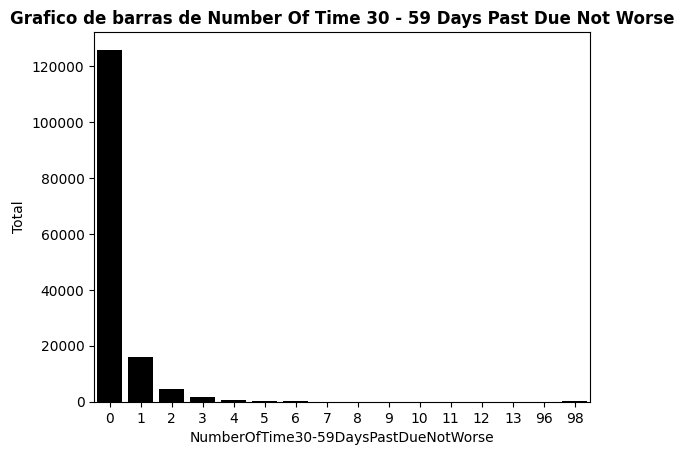

In [168]:
df_train['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()
NumberOfTime3059DaysPastDueNotWorse_1=pd.DataFrame(df_train['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().reset_index())
NumberOfTime3059DaysPastDueNotWorse_1.columns=['NumberOfTime30-59DaysPastDueNotWorse','Total']
print(NumberOfTime3059DaysPastDueNotWorse_1)
sns.barplot(data=NumberOfTime3059DaysPastDueNotWorse_1,x='NumberOfTime30-59DaysPastDueNotWorse',y='Total')
plt.title('Grafico de barras de Number Of Time 30 - 59 Days Past Due Not Worse',fontsize=12,weight='bold')
plt.show()

    NumberOfTime60-89DaysPastDueNotWorse   Total
0                                      0  142166
1                                      1    5725
2                                      2    1118
3                                      3     318
4                                     98     264
5                                      4     104
6                                      5      34
7                                      6      16
8                                      7       8
9                                     96       5
10                                     8       2
11                                    11       1
12                                     9       1


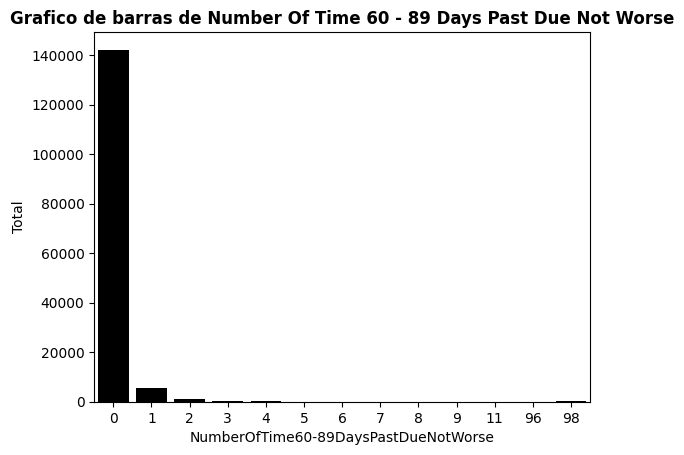

In [169]:
df_train['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()
NumberOfTime6089DaysPastDueNotWorse_1=pd.DataFrame(df_train['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().reset_index())
NumberOfTime6089DaysPastDueNotWorse_1.columns=['NumberOfTime60-89DaysPastDueNotWorse','Total']
print(NumberOfTime6089DaysPastDueNotWorse_1)
sns.barplot(data=NumberOfTime6089DaysPastDueNotWorse_1,x='NumberOfTime60-89DaysPastDueNotWorse',y='Total')
plt.title('Grafico de barras de Number Of Time 60 - 89 Days Past Due Not Worse',fontsize=12,weight='bold')
plt.show()

In [170]:
df_train=df_train[(df_train['NumberOfTimes90DaysLate'] < 96) & 
         (df_train['NumberOfTime30-59DaysPastDueNotWorse'] < 96) & 
         (df_train['NumberOfTime60-89DaysPastDueNotWorse'] < 96)]
df_test=df_test[(df_test['NumberOfTimes90DaysLate'] < 96) & 
         (df_test['NumberOfTime30-59DaysPastDueNotWorse'] < 96) & 
         (df_test['NumberOfTime60-89DaysPastDueNotWorse'] < 96)]
print(df_train.shape)
print(df_test.shape)

(149493, 11)
(101138, 11)


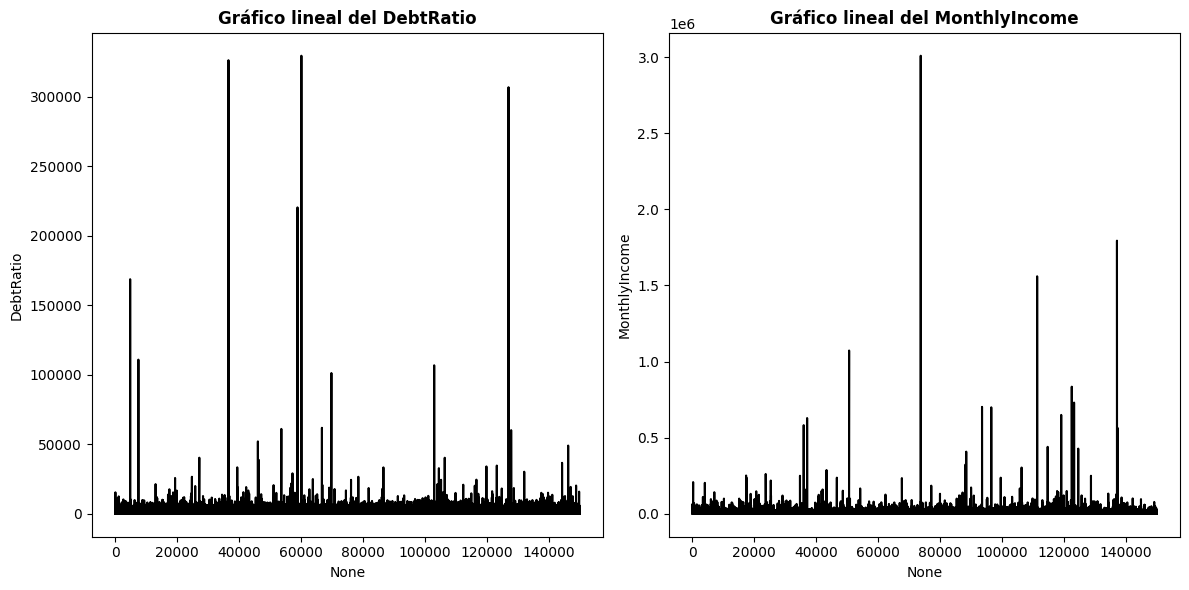

In [171]:
import seaborn as sns

# Crear figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Grafico lineal de DebtRatio
sns.lineplot(data=df_train, x=df_train.index, y='DebtRatio', ax=axes[0])
axes[0].set_title('Gráfico lineal del DebtRatio', fontsize=12, weight='bold')

# Gráfico lineal de MonthlyIncome
sns.lineplot(data=df_train, x=df_train.index, y='MonthlyIncome', ax=axes[1])
axes[1].set_title('Gráfico lineal del MonthlyIncome', fontsize=12, weight='bold')

# Ajustes de diseño
plt.tight_layout()

# Mostrar gráficos
plt.show()


    NumberOfDependents  Total
0                  0.0  86573
1                  1.0  26258
2                  2.0  19473
3                  3.0   9462
4                  4.0   2857
5                  5.0    745
6                  6.0    158
7                  7.0     51
8                  8.0     24
9                 10.0      5
10                 9.0      5
11                20.0      1
12                13.0      1


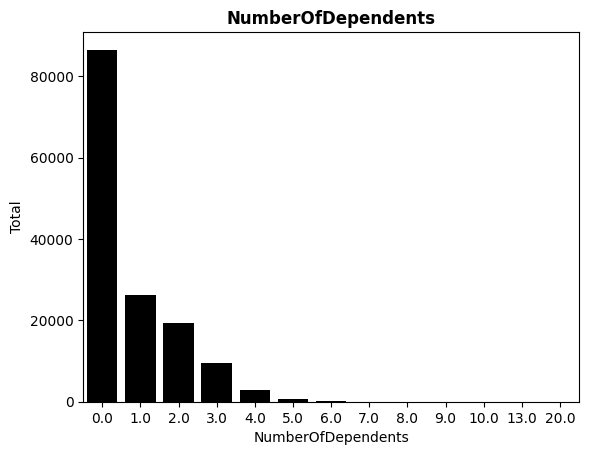

In [172]:
df_train['NumberOfDependents'].value_counts()
NumberOfDependents_1=pd.DataFrame(df_train['NumberOfDependents'].value_counts().reset_index())
NumberOfDependents_1.columns=['NumberOfDependents','Total']
print(NumberOfDependents_1)
sns.barplot(data=NumberOfDependents_1,x='NumberOfDependents',y='Total')
plt.title('NumberOfDependents',fontsize=12,weight='bold')
plt.show()

In [174]:
df_train.dropna(subset=['MonthlyIncome'], inplace=True)
df_test.dropna(subset=['MonthlyIncome'],inplace=True)

In [175]:
print(df_train.isnull().sum())

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [179]:
print(df_train.shape)
print('')
print(df_test.shape)

(119951, 11)

(81172, 11)


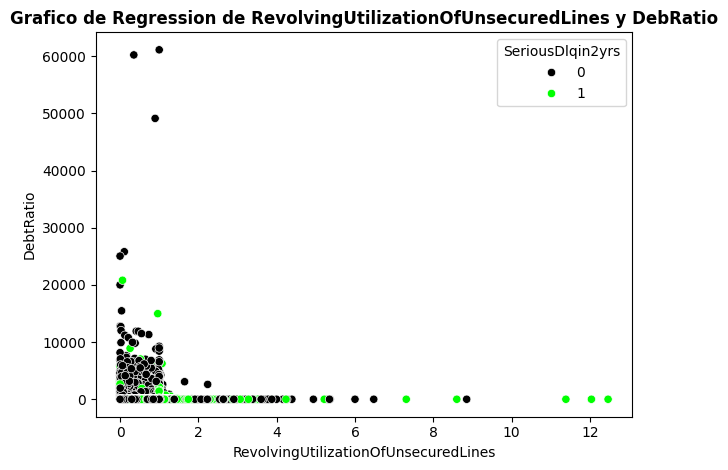

In [176]:
sns.scatterplot(data=df_train,x='RevolvingUtilizationOfUnsecuredLines',y='DebtRatio',hue='SeriousDlqin2yrs')
plt.title('Grafico de Regression de RevolvingUtilizationOfUnsecuredLines y DebRatio',fontsize=12,weight='bold')
plt.tight_layout()
plt.show()

In [183]:
df_train.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,0.269868,-0.101110,0.273335,-0.003141,-0.019044,-0.023710,0.306675,-0.000815,0.261598,0.047280
RevolvingUtilizationOfUnsecuredLines,0.269868,1.000000,-0.255935,0.240438,0.000466,-0.034220,-0.159287,0.242661,-0.073979,0.200286,0.080552
age,-0.101110,-0.255935,1.000000,-0.060646,-0.001287,0.037288,0.185577,-0.076238,0.064190,-0.062978,-0.207286
NumberOfTime30-59DaysPastDueNotWorse,0.273335,0.240438,-0.060646,1.000000,0.000849,-0.001862,0.069186,0.219551,0.036388,0.305035,0.058682
DebtRatio,-0.003141,0.000466,-0.001287,0.000849,1.000000,-0.028706,0.008587,-0.003725,0.019519,0.004004,0.009843
MonthlyIncome,-0.019044,-0.034220,0.037288,-0.001862,-0.028706,1.000000,0.091122,-0.019877,0.124526,-0.011462,0.062464
NumberOfOpenCreditLinesAndLoans,-0.023710,-0.159287,0.185577,0.069186,0.008587,0.091122,1.000000,-0.096037,0.425848,-0.025397,0.038050
NumberOfTimes90DaysLate,0.306675,0.242661,-0.076238,0.219551,-0.003725,-0.019877,-0.096037,1.000000,-0.061742,0.291531,0.033953
NumberRealEstateLoansOrLines,-0.000815,-0.073979,0.064190,0.036388,0.019519,0.124526,0.425848,-0.061742,1.000000,-0.021230,0.118755
NumberOfTime60-89DaysPastDueNotWorse,0.261598,0.200286,-0.062978,0.305035,0.004004,-0.011462,-0.025397,0.291531,-0.021230,1.000000,0.036352


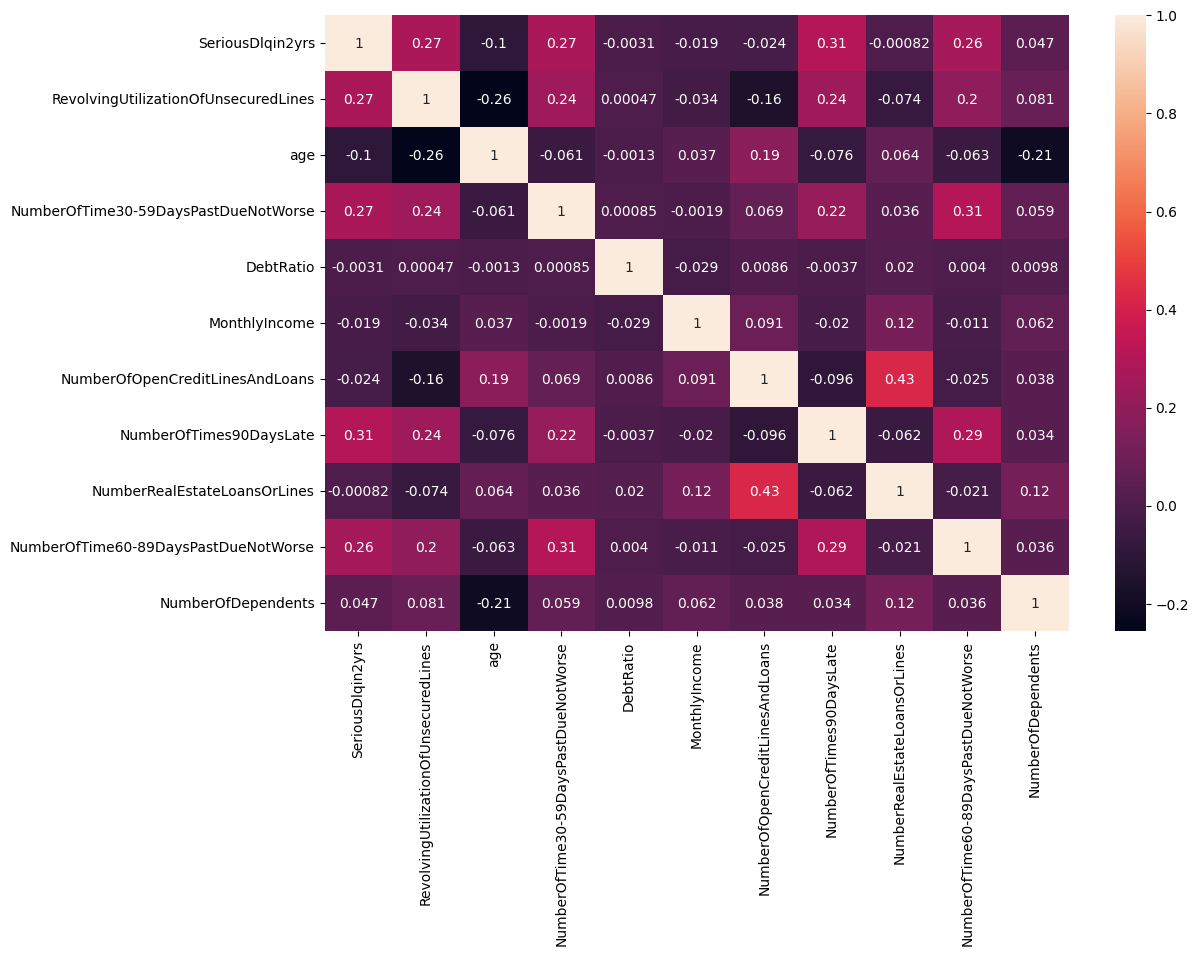

In [185]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

## **Machine Learning Models**

In [205]:
train_X = df_train.drop(["SeriousDlqin2yrs"], axis=1)
#train_y = np.log1p(df_train["SeriousDlqin2yrs"].values)
train_y=df_train['SeriousDlqin2yrs']

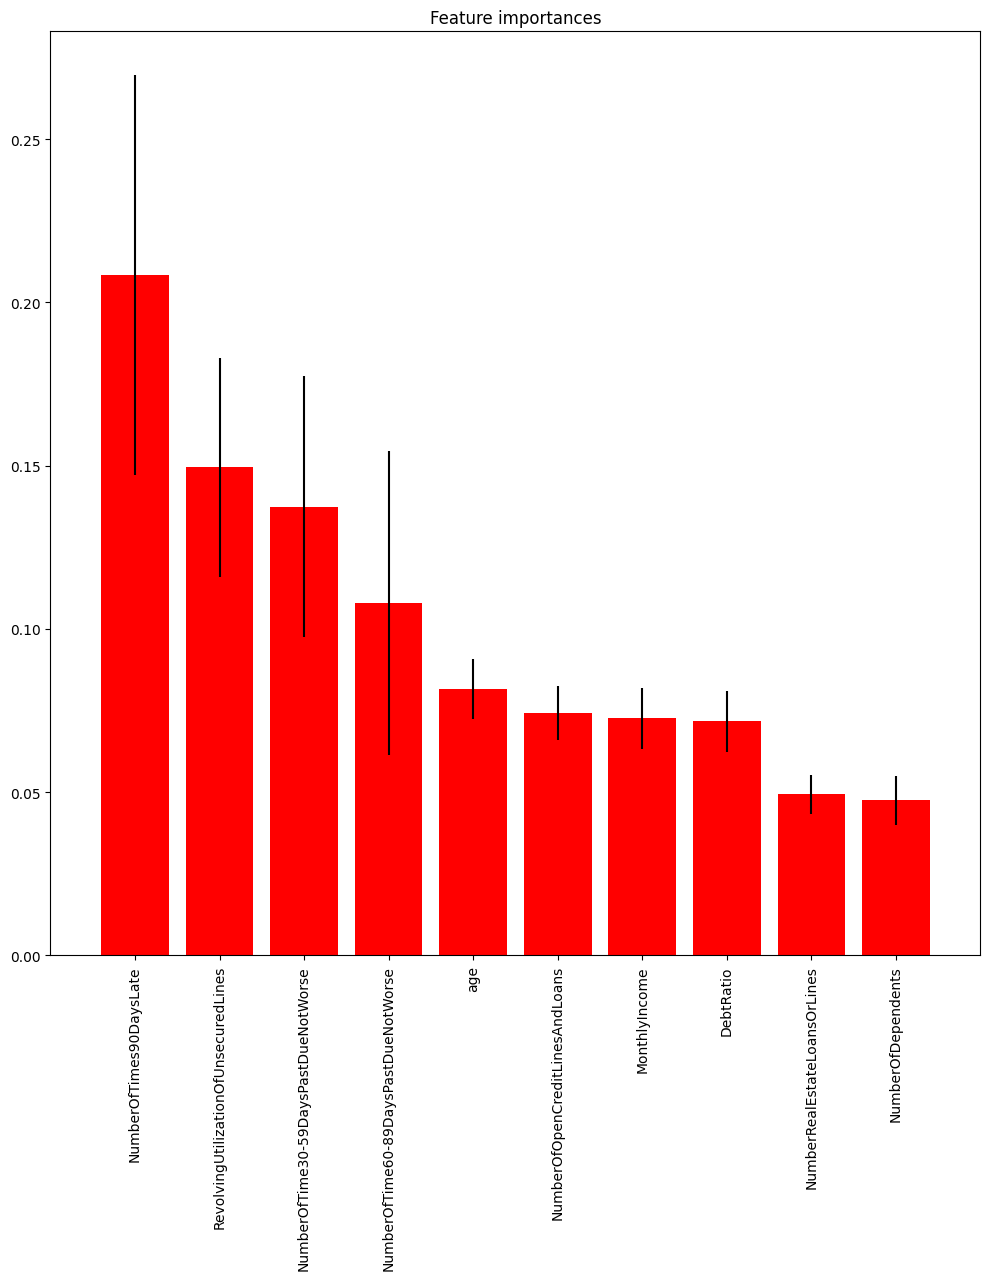

In [206]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=200, max_depth=20, max_features=0.5, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)

## plotando as importâncias ##
feat_names = train_X.columns.values
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [207]:
X_train,X_test,y_train,y_test=train_test_split(train_X,train_y,test_size=0.2,random_state=100)

**LogisticRegression**

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define los hiperparámetros para la regresión logística
params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

# Inicializa el modelo de regresión logística
lr = LogisticRegression()

# Inicializa la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(lr, params, cv=5)

# Ajusta la búsqueda de cuadrícula al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Los mejores hiperparámetros encontrados
print(grid_search.best_params_)


{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [210]:
from sklearn.linear_model import LogisticRegression

# Inicializa el modelo de regresión logística con los mejores parámetros
lr = LogisticRegression(**grid_search.best_params_)

# Ajusta el modelo a los datos de entrenamiento
lr.fit(X_train, y_train)


LogisticRegression(C=1, solver='liblinear')

In [211]:
y_pred=lr.predict(X_test)
print("Accuracy Score :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score : 93.46 %


In [213]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,jaccard_score,log_loss
def calculate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred,average='micro')
    prec = precision_score(y_true, y_pred,average='micro')
    rec = recall_score(y_true, y_pred,average='micro')
    jacc=jaccard_score(y_true,y_pred,average='micro')
    log=log_loss(y_true,y_pred)
    return {'Accuracy': acc, 'F1 Score': f1, 'Precision': prec, 'Recall': rec,'Jaccard':jacc,'Log':log}
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.9346004751781918,
 'F1 Score': 0.9346004751781918,
 'Precision': 0.9346004751781918,
 'Recall': 0.9346004751781918,
 'Jaccard': 0.8772300469483568,
 'Log': 2.357237804490218}

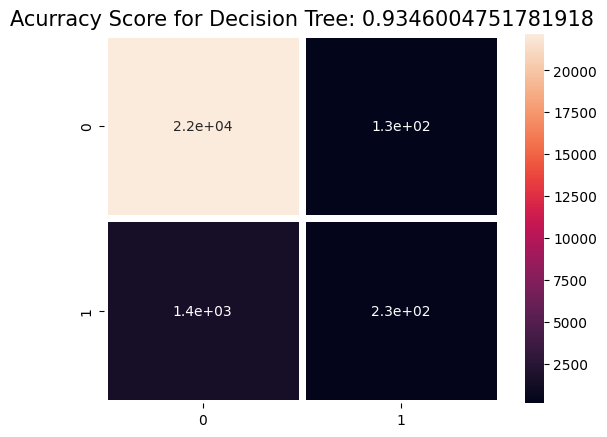

In [215]:
def matrix(model):
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Decision Tree: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(lr)

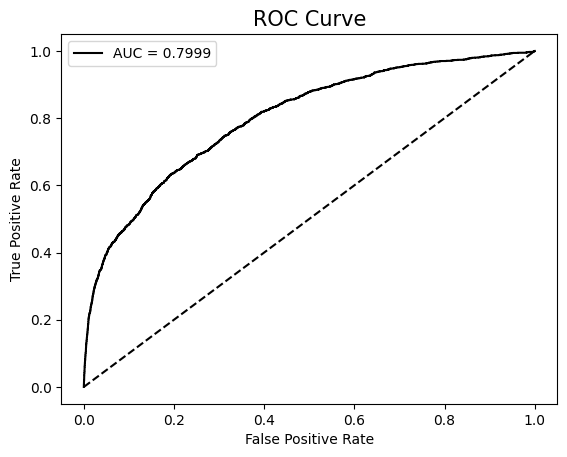

In [216]:
def roc_model(model):
  from sklearn.metrics import roc_curve, roc_auc_score
  y_pred_proba=model.predict_proba(X_test)[:][:,1]
  df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
  df_actual_predicted.index = y_test.index
  fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
  auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

  plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
  plt.plot(fpr, fpr, linestyle = '--', color='k')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve', size = 15)
  plt.legend()

roc_model(lr)

* **RandomForestClassifier**

In [221]:
rf=RandomForestClassifier()
params={'criterion':['gini', 'entropy', 'log_loss'],
        'n_estimators':[10,50,100],
        'max_depth':[None,5,10],
        'min_samples_split':[2,3],
        'min_samples_leaf':[1,2],
        'max_features':['sqrt','log2',None]}

# Inicializa el modelo de regresión RandomForestClassifier
rf = RandomForestClassifier()
# Inicializa la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(rf, params, cv=5)
# Ajusta la búsqueda de cuadrícula al conjunto de entrenamiento
grid_search.fit(X_train, y_train)
# Los mejores hiperparámetros encontrados
print(grid_search.best_params_)

{'criterion': 'log_loss', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [222]:
# Inicializa el modelo de regresión logística con los mejores parámetros
rf = RandomForestClassifier(**grid_search.best_params_)

# Ajusta el modelo a los datos de entrenamiento
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=5, max_features=None,
                       n_estimators=10)

In [223]:
y_pred=rf.predict(X_test)
print("Accuracy Score :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score : 93.51 %


In [224]:
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.9350589804510024,
 'F1 Score': 0.9350589804510024,
 'Precision': 0.9350589804510024,
 'Recall': 0.9350589804510024,
 'Jaccard': 0.8780382793847117,
 'Log': 2.3407115993599485}

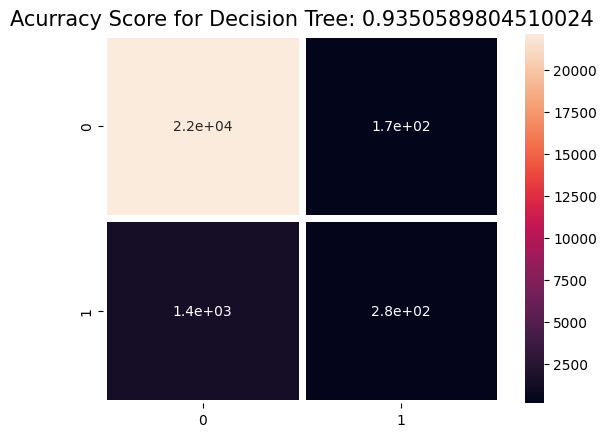

In [225]:
matrix(rf)

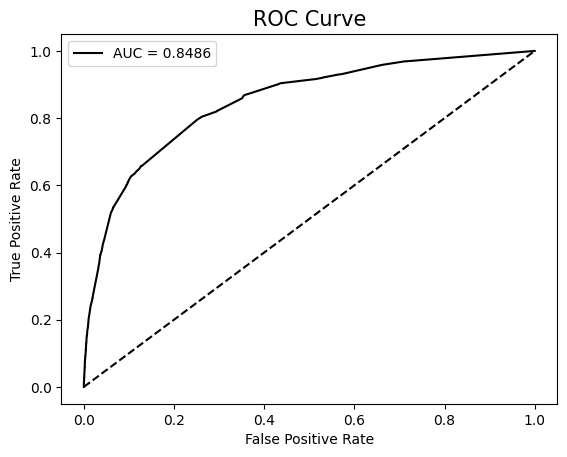

In [226]:
roc_model(rf)